In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

export_alim_path=r'D:\user\Documents\Simplon\export_alimconfiance.csv'
df=pd.read_csv(export_alim_path, sep=";")
df.head()

,APP_Libelle_etablissement,SIRET,Adresse_2_UA,Code_postal,Libelle_commune,Numero_inspection,Date_inspection,APP_Libelle_activite_etablissement,Synthese_eval_sanit,Agrement,geores,filtre,ods_type_activite
0,NATURALIA FRANCE (NATURALIA FRANCE),30247464800789,45 AV PIERRE LAROUSSE,92240.0,MALAKOFF,15914760,2021-03-03T01:00:00+01:00,Alimentation générale,Satisfaisant,NaN,"48.822231,2.303769",Alimentation générale,Autres
1,KERMOYAN (RESTAU RAPIDE),30112032500024,MARCHE,69500.0,BRON,16252422,2021-11-26T01:00:00+01:00,Restaurant,Très satisfaisant,NaN,"45.743534,4.922893",Restaurant,Autres
2,NATURALIA (NATURALIA FRANCE),30247464801894,36 RUE EUGENE EICHENBERGER,92800.0,PUTEAUX,15903092,2021-02-22T01:00:00+01:00,Alimentation générale,Très satisfaisant,NaN,"48.881317,2.23746",Alimentation générale,Autres
3,JARDINERIE DE CHEVREUSE (JARDINERIE DE CHEVREUSE),30890741900011,LE BREUIL,78460.0,CHEVREUSE,15901554,2021-02-19T01:00:00+01:00,_,Satisfaisant,NaN,"48.698235,2.027014",NaN,Autres
4,INTERMARCHE (VIRODIS),30668909200022,38 AV LE FOLL,94290.0,VILLENEUVE LE ROI,15968279,2021-04-14T02:00:00+02:00,Alimentation générale,Satisfaisant,NaN,"48.730573,2.426559",Alimentation générale,Autres


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35880 entries, 0 to 35879
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   APP_Libelle_etablissement           35880 non-null  object 
 1   SIRET                               35880 non-null  object 
 2   Adresse_2_UA                        35430 non-null  object 
 3   Code_postal                         35871 non-null  float64
 4   Libelle_commune                     35880 non-null  object 
 5   Numero_inspection                   35880 non-null  object 
 6   Date_inspection                     35880 non-null  object 
 7   APP_Libelle_activite_etablissement  35880 non-null  object 
 8   Synthese_eval_sanit                 35880 non-null  object 
 9   Agrement                            10020 non-null  object 
 10  geores                              35098 non-null  object 
 11  filtre                              26035

In [2]:
df.isna().sum()

APP_Libelle_etablissement                 0
SIRET                                     0
Adresse_2_UA                            450
Code_postal                               9
Libelle_commune                           0
Numero_inspection                         0
Date_inspection                           0
APP_Libelle_activite_etablissement        0
Synthese_eval_sanit                       0
Agrement                              25860
geores                                  782
filtre                                 9845
ods_type_activite                         0
dtype: int64

In [9]:
# sns.pairplot(df)

In [10]:
df.shape

(35880, 13)

Text(0, 0.5, 'fréquence')

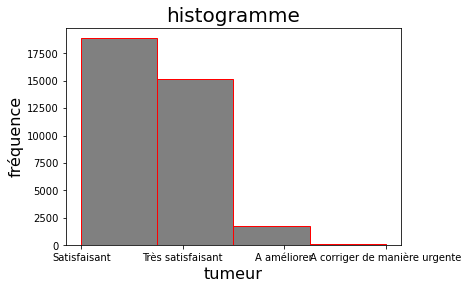

In [11]:
plt.hist(df.Synthese_eval_sanit, bins=4, color = "gray", edgecolor = 'red')
plt.title('histogramme',fontsize = 20)
plt.xlabel('tumeur',fontsize = 16)
plt.ylabel('fréquence', fontsize = 16)

In [12]:
# corr_df = df.corr()

# plt.figure(figsize=(8, 6))
# sns.heatmap(corr_df, annot=True)
# plt.show()

# corr_df.style.background_gradient(cmap='coolwarm')

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
%matplotlib inline
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_text

# export_alim_path=r'D:\user\Documents\Simplon\IASecuAlim\CSVFiles\20220106_export_alimconfiance.csv'
# df=pd.read_csv(export_alim_path, sep=";")
# df.info()

In [4]:
#df = df._convert(numeric=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35662 entries, 0 to 35661
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   APP_Libelle_etablissement           35662 non-null  object
 1   SIRET                               35662 non-null  object
 2   Adresse_2_UA                        35211 non-null  object
 3   Code_postal                         35662 non-null  object
 4   Libelle_commune                     35662 non-null  object
 5   Numero_inspection                   35662 non-null  object
 6   Date_inspection                     35662 non-null  object
 7   APP_Libelle_activite_etablissement  35662 non-null  object
 8   Synthese_eval_sanit                 35662 non-null  object
 9   Agrement                            9840 non-null   object
 10  geores                              34563 non-null  object
 11  filtre                              25999 non-null  ob

In [3]:
df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35662 entries, 0 to 35661
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   APP_Libelle_etablissement           35662 non-null  object
 1   SIRET                               35662 non-null  object
 2   Adresse_2_UA                        35211 non-null  object
 3   Code_postal                         35662 non-null  object
 4   Libelle_commune                     35662 non-null  object
 5   Numero_inspection                   35662 non-null  object
 6   Date_inspection                     35662 non-null  object
 7   APP_Libelle_activite_etablissement  35662 non-null  object
 8   Synthese_eval_sanit                 35662 non-null  object
 9   Agrement                            9840 non-null   object
 10  geores                              34563 non-null  object
 11  filtre                              25999 non-null  ob

In [10]:
# Code_postal
# Récupération du département dans le code postal (suppression des 3 dernier chiffres)
df['Code_postal'] = df['Code_postal'].apply(lambda x: str(x)[:2])
df['Code_postal'] = df['Code_postal'].astype(int)

In [11]:
# from sklearn.preprocessing import OneHotEncoder


# data_dummies = pd.get_dummies(df, columns=['Synthese_eval_sanit'])

# display(data_dummies.columns)

# data_dummies.head(5)

# # enc = OneHotEncoder(handle_unknown='ignore')

# # # passing bridge-types-cat column (label encoded values of bridge_types)
# # enc_df = pd.DataFrame(enc.fit_transform(df[['Synthese_eval_sanit']]).toarray())
# # # merge with main df bridge_df on key values
# # #df = df.join(enc_df)

# # print(df['Synthese_eval_sanit'].value_counts())
# # print(f'test: {enc_df}')

# data_dummies.info()
# data_dummies.head(30)

Index(['APP_Libelle_etablissement', 'SIRET', 'Adresse_2_UA', 'Code_postal',
       'Libelle_commune', 'Numero_inspection', 'Date_inspection',
       'APP_Libelle_activite_etablissement', 'Agrement', 'geores', 'filtre',
       'ods_type_activite', 'Synthese_eval_sanit_A améliorer',
       'Synthese_eval_sanit_A corriger de manière urgente',
       'Synthese_eval_sanit_Satisfaisant',
       'Synthese_eval_sanit_Très satisfaisant'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35662 entries, 0 to 35661
Data columns (total 16 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   APP_Libelle_etablissement                          35662 non-null  object
 1   SIRET                                              35662 non-null  object
 2   Adresse_2_UA                                       35211 non-null  object
 3   Code_postal                                        35662 non-null  int32 
 4   Libelle_commune                                    35662 non-null  object
 5   Numero_inspection                                  35662 non-null  object
 6   Date_inspection                                    35662 non-null  object
 7   APP_Libelle_activite_etablissement                 35662 non-null  object
 8   Agrement                                           9840 non-null   object
 9   geores           

,APP_Libelle_etablissement,SIRET,Adresse_2_UA,Code_postal,Libelle_commune,Numero_inspection,Date_inspection,APP_Libelle_activite_etablissement,Agrement,geores,filtre,ods_type_activite,Synthese_eval_sanit_A améliorer,Synthese_eval_sanit_A corriger de manière urgente,Synthese_eval_sanit_Satisfaisant,Synthese_eval_sanit_Très satisfaisant
0,NATURALIA FRANCE (NATURALIA FRANCE),30247464800789,45 AV PIERRE LAROUSSE,92,MALAKOFF,15914760,2021-03-03T01:00:00+01:00,Alimentation générale,NaN,"48.822231,2.303769",Alimentation générale,Autres,0,0,1,0
1,KERMOYAN (RESTAU RAPIDE),30112032500024,MARCHE,69,BRON,16252422,2021-11-26T01:00:00+01:00,Restaurant,NaN,"45.743534,4.922893",Restaurant,Autres,0,0,0,1
2,NATURALIA (NATURALIA FRANCE),30247464801894,36 RUE EUGENE EICHENBERGER,92,PUTEAUX,15903092,2021-02-22T01:00:00+01:00,Alimentation générale,NaN,"48.881317,2.23746",Alimentation générale,Autres,0,0,0,1
3,JARDINERIE DE CHEVREUSE (JARDINERIE DE CHEVREUSE),30890741900011,LE BREUIL,78,CHEVREUSE,15901554,2021-02-19T01:00:00+01:00,_,NaN,"48.698235,2.027014",NaN,Autres,0,0,1,0
4,INTERMARCHE (VIRODIS),30668909200022,38 AV LE FOLL,94,VILLENEUVE LE ROI,15968279,2021-04-14T02:00:00+02:00,Alimentation générale,NaN,"48.730573,2.426559",Alimentation générale,Autres,0,0,1,0
5,VOTRE MARCHE (MONSIEUR LARBI BALQUI),31064217800035,56 AV J B CLEMENT,92,BOULOGNE BILLANCOURT,15922867,2021-03-04T01:00:00+01:00,Alimentation générale,NaN,"48.845328,2.235582",Alimentation générale,Autres,0,0,1,0
6,LECLERC (PLOUDAL DISTRIBUTION),30959801900052,KERUSCAT,29,PLOUDALMEZEAU,16265073,2021-12-06T01:00:00+01:00,Rayon pain-viennoiserie-pâtisserie,NaN,"48.540309,-4.66693",NaN,Autres,0,0,0,1
7,AU PAIN SAVOYARD,31162274000018,CHEMIN DE LA PIERRE MORTE,73,TRESSERVE,16207781,2021-10-20T02:00:00+02:00,Boulangerie-Pâtisserie,NaN,"45.663407,5.903518",Boulangerie-Pâtisserie,Autres,1,0,0,0
8,SARL DEL FORNO PERE,31382172000015,227 ROUTE DE MONTMERLE,69,SAINT GEORGES DE RENEINS,15945799,2021-03-25T01:00:00+01:00,Traiteur,NaN,"46.065732,4.732491",Traiteur,Autres,0,0,1,0
9,BUFFALO GRILL,31890644300995,RUE FRANCOIS MEUNIER VIAL,69,VILLEFRANCHE SUR SAONE,16019408,2021-05-31T02:00:00+02:00,Restaurant,NaN,"45.995441,4.734151",Restaurant,Autres,0,0,0,1


In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df_type_activite=df['ods_type_activite'].astype(str)
df_type_activite_fit=le.fit_transform(df_type_activite)
df_type_activite_fit=pd.DataFrame(df_type_activite_fit, columns=['LabelEncoder'])
df_type_activite=pd.concat([df_type_activite,df_type_activite_fit], axis=1)
df['ods_type_activite'] = df_type_activite_fit
#df['ods_type_activite'].astype(int)
# Mise en forme de la colonne libelle_activite
# Suppression des lignes avec libelles manquants
df.drop(df[df['APP_Libelle_activite_etablissement'].str.contains("_")==True].index, inplace=True)

# df.to_csv(path_or_buf=r'D:\user\Documents\Simplon\IASecuAlim\CSVFiles\ods_acti_clean.csv', sep=';', index=True)

In [18]:
# from sklearn.preprocessing import OrdinalEncoder
# # define ordinal encoding
# df['Synthese_eval_sanit'].astype('category')
# encoder = OrdinalEncoder(categories=[['A corriger de manière urgente','A améliorer', 'Satisfaisant', 'Très satisfaisant']])

# # transform data
# df[['Synthese_eval_sanit']]=encoder.fit_transform(df.loc[:,['Synthese_eval_sanit']])
# print(df['Synthese_eval_sanit'].value_counts())
# df.head()

In [12]:
data_dummies.columns

Index(['APP_Libelle_etablissement', 'SIRET', 'Adresse_2_UA', 'Code_postal',
       'Libelle_commune', 'Numero_inspection', 'Date_inspection',
       'APP_Libelle_activite_etablissement', 'Agrement', 'geores', 'filtre',
       'ods_type_activite', 'Synthese_eval_sanit_A améliorer',
       'Synthese_eval_sanit_A corriger de manière urgente',
       'Synthese_eval_sanit_Satisfaisant',
       'Synthese_eval_sanit_Très satisfaisant'],
      dtype='object')

In [12]:
pip install -U --user imbalanced-learn

  Using cached imbalanced_learn-0.9.0-py3-none-any.whl (199 kB)
  Using cached scikit_learn-1.0.2-cp39-cp39-win_amd64.whl (7.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install -U psycopg2

  Using cached psycopg2-2.9.3-cp39-cp39-win_amd64.whl (1.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [17]:
# Importation du dataset depuis bdd dans Jupyter Notebook
from Classes import Connection

db = Connection.connection_to_database()
requete_libelle = 'select e.id_etablissement, e.libelle, da.libelle_activite, ta.type_activite, e.code_postal, e.agrement, nh.niveau_hygiene from etablissement e inner join concerne co on e.id_etablissement=co.id_etablissement inner join domaine_activite da on co.id_activite=da.id_activite inner join cible ci on co.id_etablissement=ci.id_etablissement inner join type_activite ta on ci.id_type_activite=ta.id_type_activite inner join inspecte i on e.id_etablissement=i.id_etablissement inner join niveau_hygiene nh on nh.id_hygiene=i.id_hygiene;'
requete_id = 'select e.id_etablissement, da.id_activite, ta.id_type_activite, e.code_postal, e.agrement, nh.id_hygiene from etablissement e inner join concerne co on e.id_etablissement=co.id_etablissement inner join domaine_activite da on co.id_activite=da.id_activite inner join cible ci on co.id_etablissement=ci.id_etablissement inner join type_activite ta on ci.id_type_activite=ta.id_type_activite inner join inspecte i on e.id_etablissement=i.id_etablissement inner join niveau_hygiene nh on nh.id_hygiene=i.id_hygiene;'

dataset = Connection.query_all(db, requete_id) 
df = pd.DataFrame(dataset, columns=['id_etablissement','id_activite', 'id_type_activite', 'code_postal','agrement','niveau_hygiene'])

# # Code_postal
# # Récupération du département dans le code postal (suppression des 3 dernier chiffres)
df['code_postal'] = df['code_postal'].apply(lambda x: str(x)[:2])
df['code_postal'] = df['code_postal'].astype("int64")

df.head(20)


Connecting to the PostgreSQL database...
Connection successful


Query successful: select e.id_etablissement, da.id_activite, ta.id_type_activite, e.code_postal, e.agrement, nh.id_hygiene from etablissement e inner join concerne co on e.id_etablissement=co.id_etablissement inner join domaine_activite da on co.id_activite=da.id_activite inner join cible ci on co.id_etablissement=ci.id_etablissement inner join type_activite ta on ci.id_type_activite=ta.id_type_activite inner join inspecte i on e.id_etablissement=i.id_etablissement inner join niveau_hygiene nh on nh.id_hygiene=i.id_hygiene; 



,id_etablissement,id_activite,id_type_activite,code_postal,agrement,niveau_hygiene
0,0,0,0,92,,0
1,0,19,0,92,,0
2,0,33,0,92,,0
3,0,30,0,92,,0
4,1,1,0,69,,1
5,0,0,0,92,,1
6,0,19,0,92,,1
7,0,33,0,92,,1
8,0,30,0,92,,1
9,2,2,0,78,,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84136 entries, 0 to 84135
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id_etablissement  84136 non-null  int64 
 1   id_activite       84136 non-null  int64 
 2   id_type_activite  84136 non-null  int64 
 3   code_postal       84136 non-null  int64 
 4   agrement          84136 non-null  object
 5   niveau_hygiene    84136 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 3.9+ MB


In [33]:
X = df[["code_postal","id_activite","id_type_activite"]]
y = df[["niveau_hygiene"]]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=1,stratify=df.niveau_hygiene)

y_train.shape

(58895, 1)

In [34]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

seed = 5
smote = SMOTE(sampling_strategy = 'auto', random_state = seed,k_neighbors = 7)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [35]:
cls = DecisionTreeClassifier(min_samples_split=30, min_samples_leaf = 10, max_depth=4)
y_train_smote.shape

(113624, 1)

In [36]:
cls.fit(X_train_smote,y_train_smote)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, min_samples_split=30)

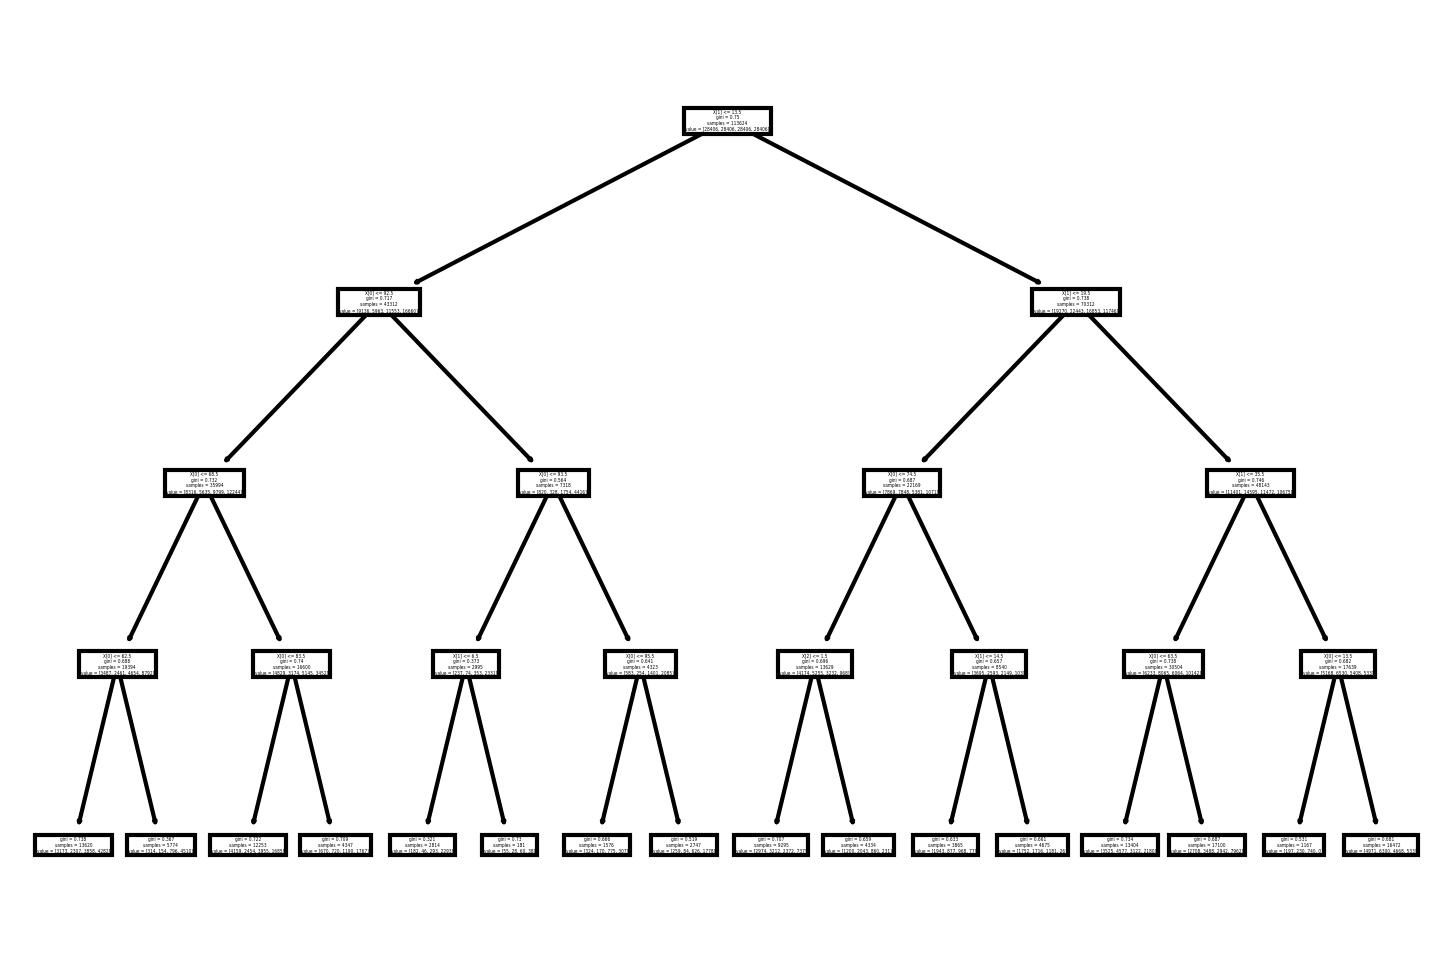

In [37]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

from sklearn import tree
tree.plot_tree(cls);

In [39]:
from sklearn.metrics import classification_report
y_pred = cls.predict(X_train_smote)
y_pred.shape

print(classification_report(y_train_smote, y_pred))

              precision    recall  f1-score   support

           0       0.38      0.28      0.32     28406
           1       0.37      0.57      0.45     28406
           2       0.54      0.06      0.10     28406
           3       0.49      0.80      0.60     28406

    accuracy                           0.42    113624
   macro avg       0.44      0.42      0.37    113624
weighted avg       0.44      0.42      0.37    113624

